Saving Dataset Elektrik.csv to Dataset Elektrik (1).csv
Dataset berhasil dimuat dengan delimiter ';'.
Beberapa baris pertama dari dataset:


,Machine_Number,Durasi,Bagian_Mesin,Nama_Komponen
0,UTS-4001 / 100000000061,"0,5",BPS_Delivery Module,Amplifier sensor
1,UTS-4005 / 100000000065,"0,5",BPS_Delivery Module,Amplifier sensor
2,UTS-4005 / 100000000065,"0,25",BPS_Delivery Module,Amplifier sensor
3,UTS-4005 / 100000000065,"0,25",BPS_Delivery Module,Amplifier sensor
4,UTS-4005 / 100000000065,"0,25",BPS_Delivery Module,Amplifier sensor


Semua kolom yang diperlukan ada dalam dataset.


<ipython-input-8-2761902914aa>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=var, data=dataset, palette='Set3', orient='h')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-

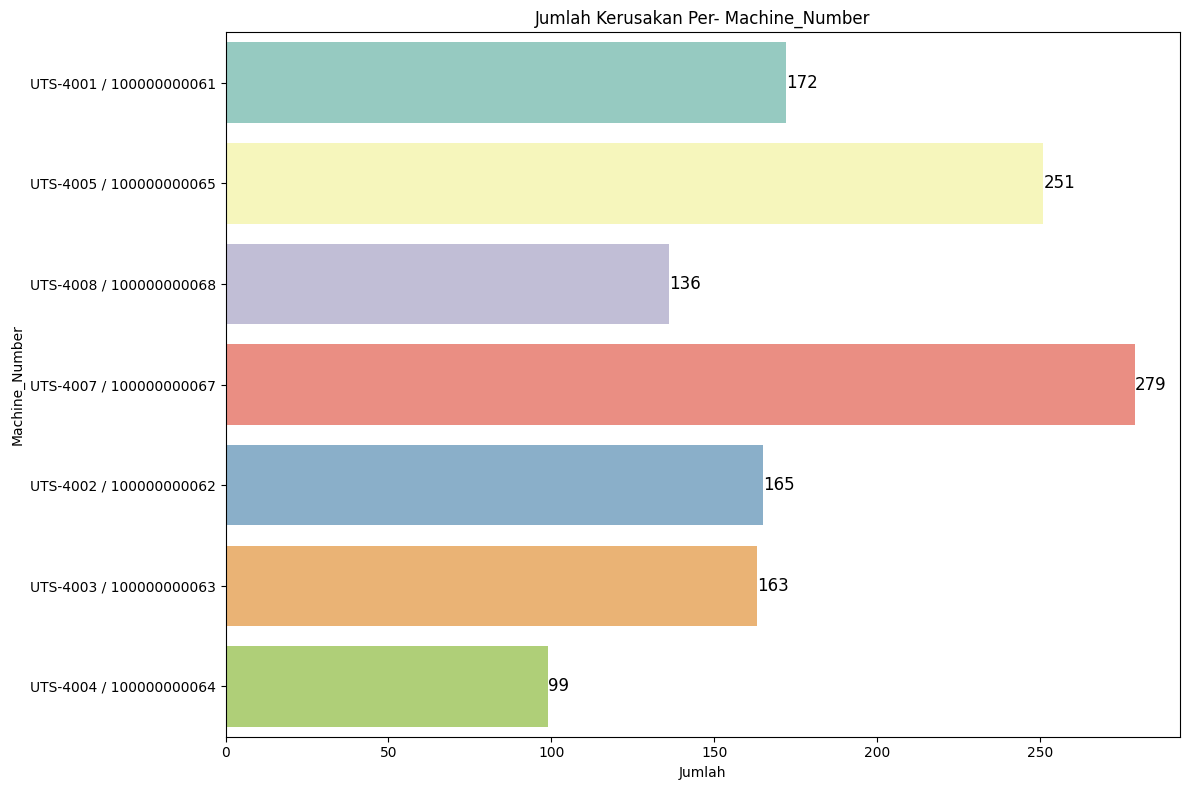

<ipython-input-8-2761902914aa>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=var, data=dataset, palette='Set3', orient='h')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-

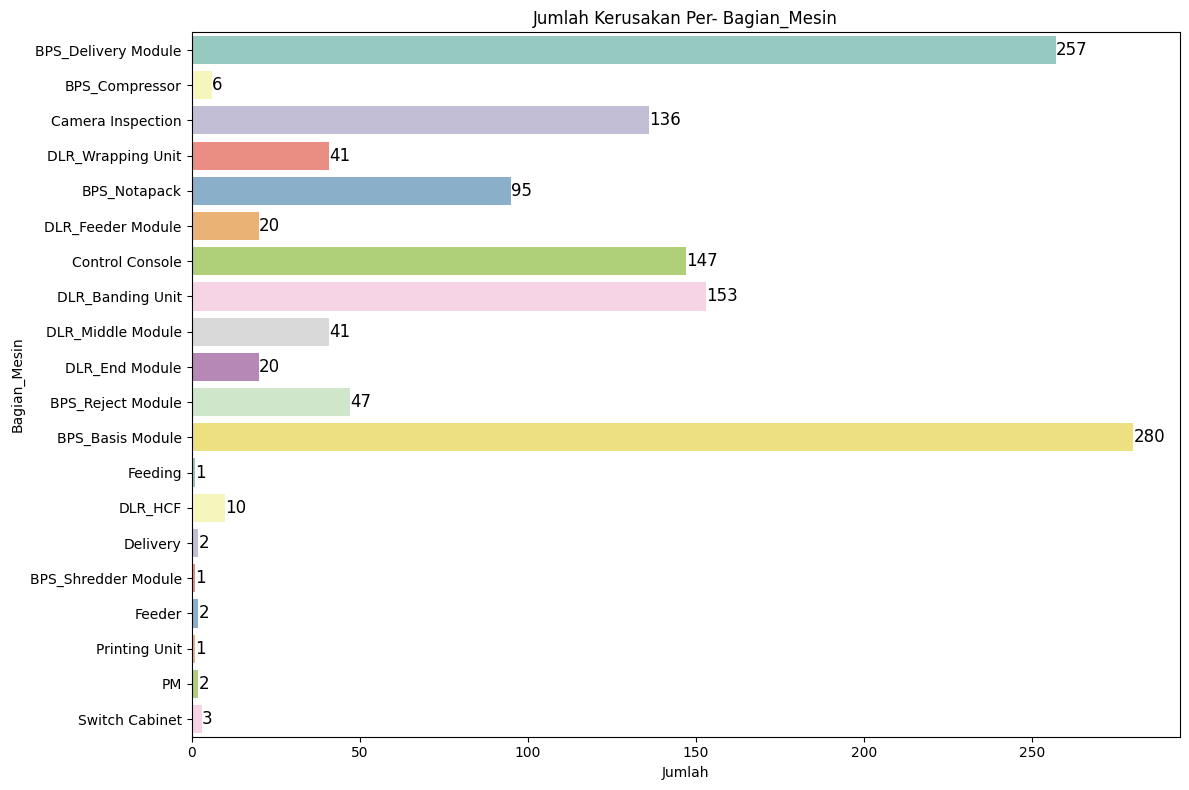

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from IPython.display import display

uploaded = files.upload()

file_path = next(iter(uploaded))

try:
    dataset = pd.read_csv(file_path, delimiter=',')
except pd.errors.ParserError:
    try:
        dataset = pd.read_csv(file_path, delimiter=';')
    except pd.errors.ParserError:
        print("Error: Tidak bisa memuat file. Periksa format file CSV Anda.")

file_path = 'Dataset Elektrik.csv'

try:
    dataset = pd.read_csv(file_path, delimiter=';')
    print("Dataset berhasil dimuat dengan delimiter ';'.")
except pd.errors.ParserError:
    print("Error: Tidak bisa memuat file dengan delimiter ';'.")

print("Beberapa baris pertama dari dataset:")
display(dataset.head())  # Menggunakan display agar terlihat seperti tabel

required_columns = ['Machine_Number', 'Bagian_Mesin']
missing_columns = [col for col in required_columns if col not in dataset.columns]

if missing_columns:
    print(f"Kolom berikut tidak ditemukan dalam dataset: {', '.join(missing_columns)}")
else:
    print("Semua kolom yang diperlukan ada dalam dataset.")

if not missing_columns:
    if 'Machine_Number' in dataset.columns:
        dataset['Machine_Number'] = dataset['Machine_Number'].astype(str)

    for var in required_columns:
        if var in dataset.columns:
            plt.figure(figsize=(12, 8))
            sns.countplot(y=var, data=dataset, palette='Set3', orient='h')
            plt.title(f'Jumlah Kerusakan Per- {var}')
            plt.ylabel(var)
            plt.xlabel('Jumlah')
            plt.xticks(rotation=0)
            plt.tight_layout()

            ax = plt.gca()
            for p in ax.patches:
                ax.text(p.get_width() + 0.1, p.get_y() + p.get_height()/2., '%d' % int(p.get_width()),
                        fontsize=12, color='black', va='center')  # Posisi label mengikuti sumbu Y
            plt.show()
        else:
            print(f"Kolom '{var}' tidak ditemukan dalam dataset.")


In [ ]:
missing_data = dataset.isnull().sum()

if missing_data.any():
    print("Kolom dengan missing value dan jumlahnya:")
    display(missing_data[missing_data > 0].sort_values(ascending=False))

    print("Data yang memiliki missing value:")
    display(dataset[dataset.isnull().any(axis=1)])

    dataset_cleaned = dataset.dropna()

    print("Data setelah pembersihan:")
    display(dataset_cleaned.head())

else:
    print("Tidak ada missing value dalam dataset.")
    dataset_cleaned = dataset  # Data tetap

    print("Data asli (tidak ada missing value):")
    display(dataset_cleaned.head())

cleaned_file_path = 'cleaned_data_no_missing.csv'
try:
    dataset_cleaned.to_csv(cleaned_file_path, index=False)
    print(f"Data yang telah diperiksa dan dibersihkan (jika ada) disimpan dalam file: {cleaned_file_path}")
except Exception as e:
    print(f"Terjadi kesalahan saat menyimpan file: {e}")

Tidak ada missing value dalam dataset.
Data asli (tidak ada missing value):


,Machine_Number,Durasi,Bagian_Mesin,Nama_Komponen
0,UTS-4001 / 100000000061,"0,5",BPS_Delivery Module,Amplifier sensor
1,UTS-4005 / 100000000065,"0,5",BPS_Delivery Module,Amplifier sensor
2,UTS-4005 / 100000000065,"0,25",BPS_Delivery Module,Amplifier sensor
3,UTS-4005 / 100000000065,"0,25",BPS_Delivery Module,Amplifier sensor
4,UTS-4005 / 100000000065,"0,25",BPS_Delivery Module,Amplifier sensor


Data yang telah diperiksa dan dibersihkan (jika ada) disimpan dalam file: cleaned_data_no_missing.csv



Dataset dengan kolom Durasi dan Tingkat_Resiko (20 baris pertama):
         Machine_Number        Bagian_Mesin    Nama_Komponen  Durasi Tingkat_Resiko
UTS-4001 / 100000000061 BPS_Delivery Module Amplifier sensor    0.50         Rendah
UTS-4005 / 100000000065 BPS_Delivery Module Amplifier sensor    0.50         Rendah
UTS-4005 / 100000000065 BPS_Delivery Module Amplifier sensor    0.25         Rendah
UTS-4005 / 100000000065 BPS_Delivery Module Amplifier sensor    0.25         Rendah
UTS-4005 / 100000000065 BPS_Delivery Module Amplifier sensor    0.25         Rendah
UTS-4005 / 100000000065 BPS_Delivery Module Amplifier sensor    0.50         Rendah
UTS-4008 / 100000000068 BPS_Delivery Module Amplifier sensor    0.50         Rendah
UTS-4001 / 100000000061 BPS_Delivery Module Amplifier Sensor    0.25         Rendah
UTS-4001 / 100000000061 BPS_Delivery Module Amplifier Sensor    0.50         Rendah
UTS-4001 / 100000000061 BPS_Delivery Module Amplifier Sensor    0.50         Rendah
UTS-4001

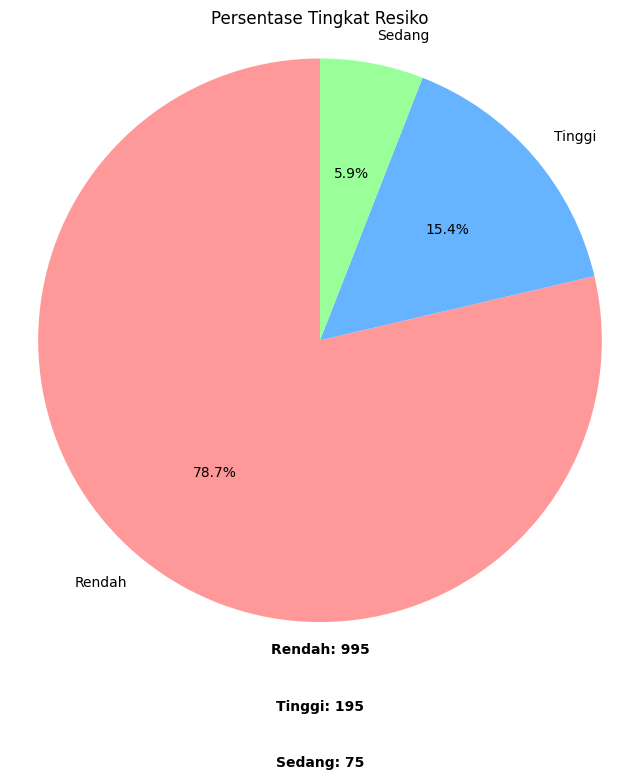


Dataset dengan kolom Durasi, Tingkat_Resiko, dan Preventive_Maintenance (20 baris pertama):
         Machine_Number    Nama_Komponen        Bagian_Mesin  Durasi Tingkat_Resiko Preventive_Maintenance
UTS-4001 / 100000000061 Amplifier sensor BPS_Delivery Module    0.50         Rendah                     Ya
UTS-4005 / 100000000065 Amplifier sensor BPS_Delivery Module    0.50         Rendah                     Ya
UTS-4005 / 100000000065 Amplifier sensor BPS_Delivery Module    0.25         Rendah                     Ya
UTS-4005 / 100000000065 Amplifier sensor BPS_Delivery Module    0.25         Rendah                     Ya
UTS-4005 / 100000000065 Amplifier sensor BPS_Delivery Module    0.25         Rendah                     Ya
UTS-4005 / 100000000065 Amplifier sensor BPS_Delivery Module    0.50         Rendah                     Ya
UTS-4008 / 100000000068 Amplifier sensor BPS_Delivery Module    0.50         Rendah                     Ya
UTS-4001 / 100000000061 Amplifier Sensor BPS_Delive

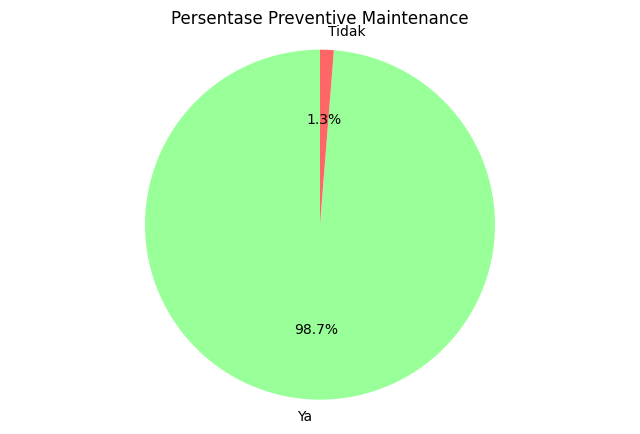

In [ ]:
file_cleaned_path = 'cleaned_data_no_missing.csv'
dataset_cleaned = pd.read_csv(file_cleaned_path)

dataset_cleaned['Durasi'] = dataset_cleaned['Durasi'].str.replace(',', '.')

dataset_cleaned['Durasi'] = pd.to_numeric(dataset_cleaned['Durasi'], errors='coerce')

def klasifikasi_durasi(durasi):
    if durasi <= 1:
        return 'Rendah'
    elif durasi > 1 and durasi < 2:
        return 'Sedang'
    else:
        return 'Tinggi'

dataset_cleaned['Tingkat_Resiko'] = dataset_cleaned['Durasi'].apply(klasifikasi_durasi)

print("\nDataset dengan kolom Durasi dan Tingkat_Resiko (20 baris pertama):")
print(dataset_cleaned[['Machine_Number', 'Bagian_Mesin', 'Nama_Komponen', 'Durasi', 'Tingkat_Resiko']].head(20).to_string(index=False))


file_path_with_tingkat_resiko = 'dataset_cleaned_with_tingkat_resiko.csv'
dataset_cleaned.to_csv(file_path_with_tingkat_resiko, index=False)

print(f"\nData yang sudah ditambah kolom Tingkat_Resiko telah disimpan ke dalam file: '{file_path_with_tingkat_resiko}'")

file_cleaned_path = 'dataset_cleaned_with_tingkat_resiko.csv'
dataset_cleaned = pd.read_csv(file_cleaned_path)

tingkat_resiko_counts = dataset_cleaned['Tingkat_Resiko'].value_counts()

labels = tingkat_resiko_counts.index
sizes = tingkat_resiko_counts.values
colors = ['#ff9999', '#66b3ff', '#99ff99']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Persentase Tingkat Resiko')
plt.axis('equal')

for i, label in enumerate(labels):
    plt.text(0, -1.1 - i*0.2, f'{label}: {sizes[i]}', ha='center', va='center', fontweight='bold')

plt.show()

file_cleaned_path = 'dataset_cleaned_with_tingkat_resiko.csv'
dataset_cleaned = pd.read_csv(file_cleaned_path)

def klasifikasi_preventive(row, count_durasi):
    if row['Tingkat_Resiko'] == 'Rendah':
        if count_durasi.get((row['Machine_Number'], row['Bagian_Mesin']), 0) > 3:
            return 'Ya'
        return 'Tidak'
    else:
        return 'Ya'

count_durasi = dataset_cleaned[dataset_cleaned['Durasi'] <= 1].groupby(['Machine_Number', 'Bagian_Mesin']).size().to_dict()

dataset_cleaned['Preventive_Maintenance'] = dataset_cleaned.apply(klasifikasi_preventive, axis=1, count_durasi=count_durasi)

print("\nDataset dengan kolom Durasi, Tingkat_Resiko, dan Preventive_Maintenance (20 baris pertama):")
print(dataset_cleaned[['Machine_Number', 'Nama_Komponen', 'Bagian_Mesin', 'Durasi', 'Tingkat_Resiko', 'Preventive_Maintenance']].head(20).to_string(index=False))

file_path_with_preventive = 'dataset_with_preventive_maintenance.csv'
dataset_cleaned.to_csv(file_path_with_preventive, index=False)

print(f"\nData yang sudah ditambah kolom Preventive_Maintenance telah disimpan ke dalam file: '{file_path_with_preventive}'")

file_path_with_preventive = 'dataset_with_preventive_maintenance.csv'
dataset_with_preventive = pd.read_csv(file_path_with_preventive)

preventive_counts = dataset_with_preventive['Preventive_Maintenance'].value_counts()

print("\nJumlah Preventive Maintenance:")
print(preventive_counts.to_string())

labels = preventive_counts.index
sizes = preventive_counts.values
colors = ['#99ff99', '#ff6666']

plt.figure(figsize=(8, 5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Persentase Preventive Maintenance')
plt.axis('equal')
plt.show()

Data training dan testing telah disimpan dalam file CSV.
Jumlah data total: 1265
Jumlah data training: 1002
Jumlah data testing: 263


<ipython-input-28-a1f29590866b>:69: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(y=train_counts.index, x=train_counts.values, color='blue', alpha=0.6, label='Train', ci=None)
<ipython-input-28-a1f29590866b>:71: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(y=test_counts.index, x=test_counts.values, color='orange', alpha=0.6, label='Test', ci=None)


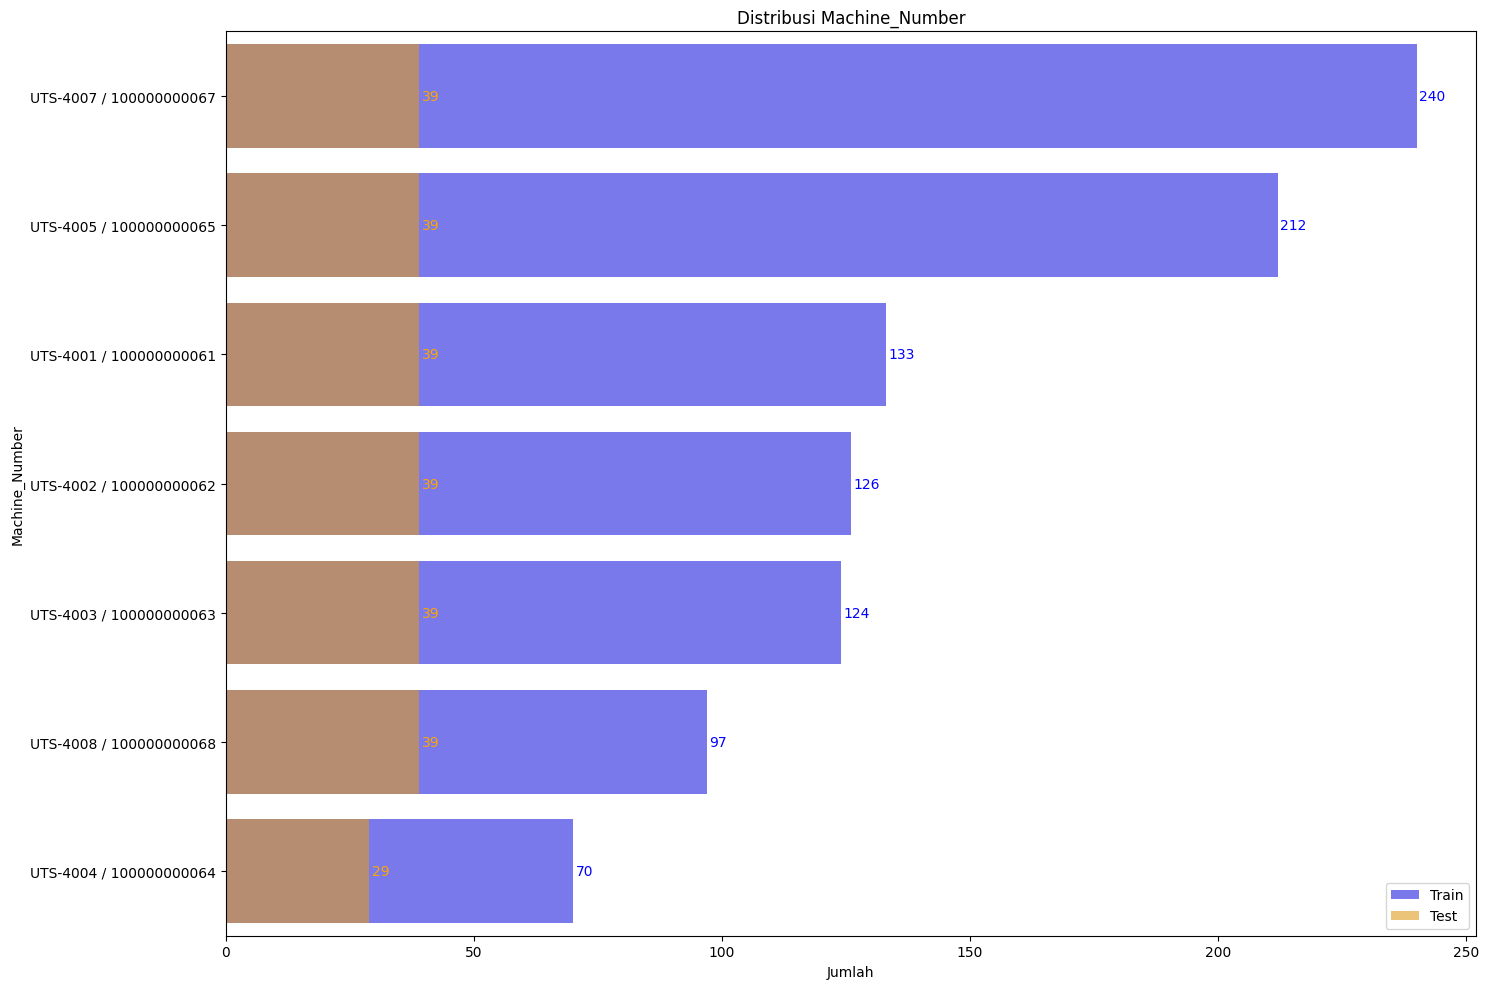

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path_with_preventive = 'dataset_with_preventive_maintenance.csv'
dataset_with_preventive = pd.read_csv(file_path_with_preventive)

X = dataset_with_preventive[['Machine_Number', 'Durasi', 'Bagian_Mesin', 'Nama_Komponen', 'Tingkat_Resiko']]
y = dataset_with_preventive['Preventive_Maintenance']

def balanced_split(X, y, test_size=0.3, max_diff=5):
    unique_machines = X['Machine_Number'].unique()
    test_indices = []
    train_indices = []

    total_count = len(X)
    test_count = int(total_count * test_size)

    for machine in unique_machines:
        indices = X[X['Machine_Number'] == machine].index
        num_samples = len(indices)

        test_samples_per_machine = max(1, int(num_samples * test_size))
        test_samples_per_machine = min(test_samples_per_machine, num_samples - 1)
        test_samples_per_machine = min(test_samples_per_machine, max_diff)

        indices_list = indices.tolist()
        np.random.shuffle(indices_list)

        test_sample = indices_list[:test_samples_per_machine]
        train_sample = indices_list[test_samples_per_machine:]

        test_indices.extend(test_sample)
        train_indices.extend(train_sample)

    X_train = X.loc[train_indices]
    X_test = X.loc[test_indices]
    y_train = y.loc[train_indices]
    y_test = y.loc[test_indices]

    assert set(test_indices).isdisjoint(train_indices), "Overlap ditemukan antara data test dan training"

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = balanced_split(X, y, test_size=0.3, max_diff=39)

train_data = pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)
train_data.to_csv('train_data.csv', index=False)

test_data = pd.concat([X_test.reset_index(drop=True), y_test.reset_index(drop=True)], axis=1)
test_data.to_csv('test_data.csv', index=False)

print("Data training dan testing telah disimpan dalam file CSV.")

print(f"Jumlah data total: {len(X)}")
print(f"Jumlah data training: {len(X_train)}")
print(f"Jumlah data testing: {len(X_test)}")

features = ['Machine_Number']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(1, 1, i)

    train_counts = X_train[feature].value_counts()
    test_counts = X_test[feature].value_counts()

    sns.barplot(y=train_counts.index, x=train_counts.values, color='blue', alpha=0.6, label='Train', ci=None)

    sns.barplot(y=test_counts.index, x=test_counts.values, color='orange', alpha=0.6, label='Test', ci=None)

    for idx, value in enumerate(train_counts):
        plt.text(value + 0.5, idx, str(value), va='center', color='blue')

    for idx, value in enumerate(test_counts):
        plt.text(value + 0.5, idx, str(value), va='center', color='orange')

    plt.title(f'Distribusi {feature}')
    plt.ylabel(feature)
    plt.xlabel('Jumlah')
    plt.legend()

    plt.yticks(rotation=0)

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

train_data = pd.read_csv('train_data.csv')

X_train = train_data[['Machine_Number', 'Durasi','Bagian_Mesin','Nama_Komponen','Tingkat_Resiko']]
y_train = train_data['Preventive_Maintenance']

le_y = LabelEncoder()
y_train = le_y.fit_transform(y_train)

label_encoders = {}
for column in X_train.columns:
    if X_train[column].dtype == 'object':
        le = LabelEncoder()
        X_train[column] = le.fit_transform(X_train[column])
        label_encoders[column] = le

prior_probabilities = pd.Series(y_train).value_counts(normalize=True)
prior_probabilities.index = le_y.inverse_transform(prior_probabilities.index)
prior_probabilities = prior_probabilities.sort_index()

aprior_df = pd.DataFrame({
    'Variable': ['Preventive_Maintenance'] * len(prior_probabilities),
    'Value': prior_probabilities.index,
    'P(Tidak)': prior_probabilities.get('Tidak', 0),
    'P(Ya)': prior_probabilities.get('Ya', 0)
})

conditional_probabilities = {}
for column in X_train.columns:
    probs = pd.crosstab(X_train[column], y_train, normalize='columns')
    if column in label_encoders:
        probs.index = label_encoders[column].inverse_transform(probs.index)
    probs.columns = le_y.inverse_transform(probs.columns)
    conditional_probabilities[column] = probs

conditional_list = []
for column, probs in conditional_probabilities.items():
    for value in probs.index:
        conditional_list.append({
            'Variable': column,
            'Value': value,
            'P(Tidak)': probs.at[value, 'Tidak'] if 'Tidak' in probs.columns else 0,
            'P(Ya)': probs.at[value, 'Ya'] if 'Ya' in probs.columns else 0
        })

conditional_df = pd.DataFrame(conditional_list)

final_df = pd.concat([conditional_df, aprior_df], ignore_index=True)

output_path = 'probabilities.csv'
final_df.to_csv(output_path, index=False)

print("File dengan probabilitas posterior dan apriori telah disimpan.")

File dengan probabilitas posterior dan apriori telah disimpan.


<ipython-input-29-a6e159e03323>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[column] = le.fit_transform(X_train[column])
<ipython-input-29-a6e159e03323>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[column] = le.fit_transform(X_train[column])
<ipython-input-29-a6e159e03323>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

In [ ]:
import pandas as pd
import numpy as np

test_data = pd.read_csv('test_data.csv')

posterior_df = pd.read_csv('probabilities.csv')

posterior_dict = {}
for _, row in posterior_df.iterrows():
    if row['Variable'] not in posterior_dict:
        posterior_dict[row['Variable']] = {}
    posterior_dict[row['Variable']][row['Value']] = {
        'P(Tidak)': row['P(Tidak)'],
        'P(Ya)': row['P(Ya)']
    }

def calculate_posterior(row):
    prob_ya = 1.0
    prob_tidak = 1.0

    for column in posterior_dict:
        if row[column] in posterior_dict[column]:
            prob_ya *= posterior_dict[column][row[column]]['P(Ya)']
            prob_tidak *= posterior_dict[column][row[column]]['P(Tidak)']
        else:
            # Jika nilai tidak ada dalam probabilitas, gunakan nilai kecil
            prob_ya *= 1e-10
            prob_tidak *= 1e-10

    return pd.Series([prob_ya, prob_tidak], index=['Evaluasi_PM_Ya', 'Evaluasi_PM_Tidak'])

test_data[['Evaluasi_PM_Ya', 'Evaluasi_PM_Tidak']] = test_data.apply(calculate_posterior, axis=1)

def classify(row):
    if row['Evaluasi_PM_Ya'] > row['Evaluasi_PM_Tidak']:
        return 'Ya'
    else:
        return 'Tidak'

test_data['Class_Prediction'] = test_data.apply(classify, axis=1)

output_test_path = 'evaluated_test_data_with_classification.csv'
test_data.to_csv(output_test_path, index=False)

print("File dengan hasil evaluasi dan klasifikasi telah disimpan.")

File dengan hasil evaluasi dan klasifikasi telah disimpan.


Distribusi Preventive_Maintenance:
Preventive_Maintenance
Ya       262
Tidak      1
Name: count, dtype: int64
Distribusi Class_Prediction:
Class_Prediction
Ya       262
Tidak      1
Name: count, dtype: int64
Jumlah True Positives: 262
Jumlah True Negatives: 1
Jumlah False Negatives: 0
Jumlah False Positives: 0


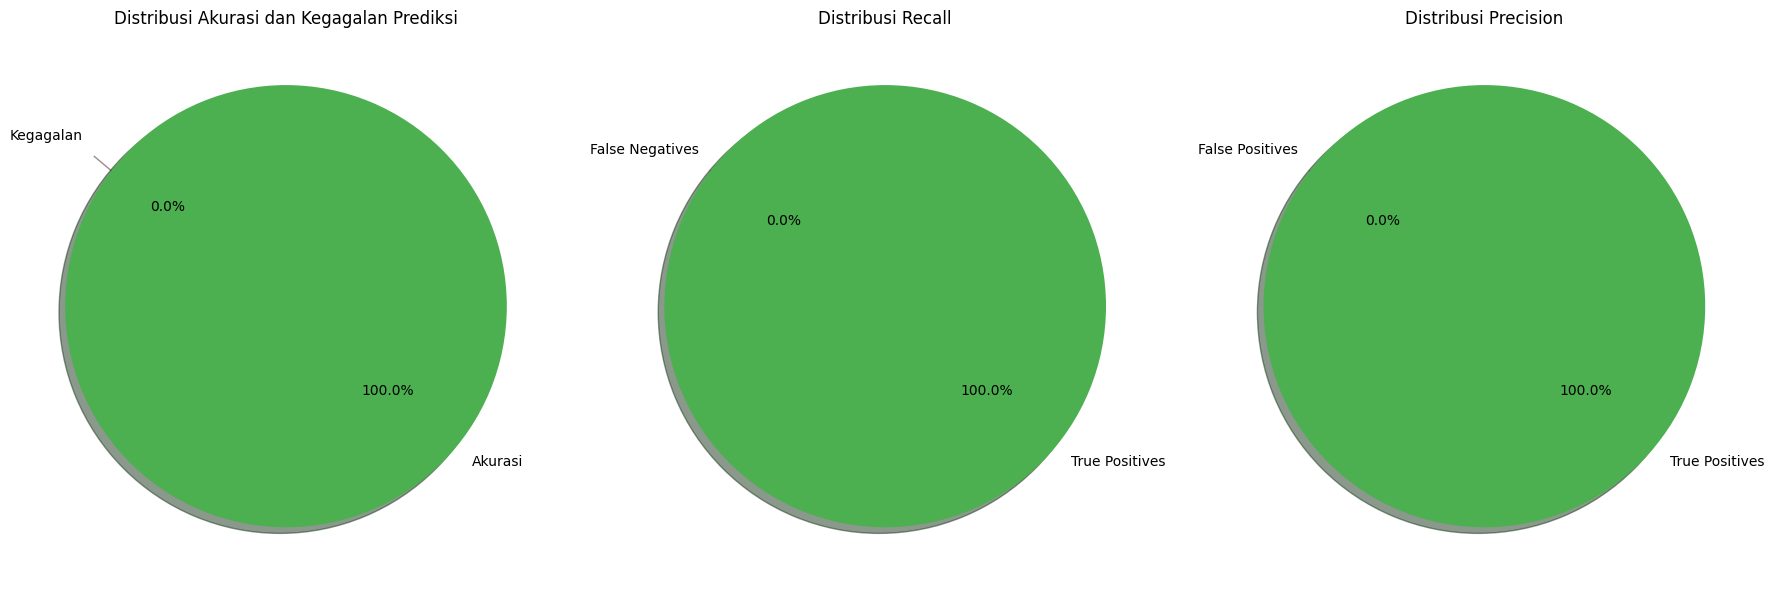

Persentase Keberhasilan: 100.00%
Jumlah prediksi benar: 263
Persentase kegagalan: 0.00%
Jumlah prediksi salah: 0
Recall: 100.00%
Precision: 100.00%


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

posterior_df = pd.read_csv('evaluated_test_data_with_classification.csv')

correct_predictions = (posterior_df['Preventive_Maintenance'] == posterior_df['Class_Prediction']).sum()
total_predictions = len(posterior_df)
accuracy_percentage = (correct_predictions / total_predictions) * 100

incorrect_predictions = total_predictions - correct_predictions
failure_percentage = (incorrect_predictions / total_predictions) * 100

true_positives = ((posterior_df['Preventive_Maintenance'] == 'Ya') & (posterior_df['Class_Prediction'] == 'Ya')).sum()
false_negatives = ((posterior_df['Preventive_Maintenance'] == 'Ya') & (posterior_df['Class_Prediction'] == 'Tidak')).sum()
recall = true_positives / (true_positives + false_negatives) * 100 if (true_positives + false_negatives) > 0 else 0

false_positives = ((posterior_df['Preventive_Maintenance'] == 'Tidak') & (posterior_df['Class_Prediction'] == 'Ya')).sum()
precision = true_positives / (true_positives + false_positives) * 100 if (true_positives + false_positives) > 0 else 0

print("Distribusi Preventive_Maintenance:")
print(posterior_df['Preventive_Maintenance'].value_counts())
print("Distribusi Class_Prediction:")
print(posterior_df['Class_Prediction'].value_counts())

print(f"Jumlah True Positives: {true_positives}")
true_negatives = ((posterior_df['Preventive_Maintenance'] == 'Tidak') & (posterior_df['Class_Prediction'] == 'Tidak')).sum()
print(f"Jumlah True Negatives: {true_negatives}")
print(f"Jumlah False Negatives: {false_negatives}")
print(f"Jumlah False Positives: {false_positives}")

labels_accuracy = 'Akurasi', 'Kegagalan'
sizes_accuracy = [accuracy_percentage, failure_percentage]
colors_accuracy = ['#4CAF50', '#F44336']
explode_accuracy = (0.1, 0)

labels_recall = 'True Positives', 'False Negatives'
sizes_recall = [true_positives, false_negatives]
colors_recall = ['#4CAF50', '#F44336']

labels_precision = 'True Positives', 'False Positives'
sizes_precision = [true_positives, false_positives]
colors_precision = ['#4CAF50', '#F44336']

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].pie(sizes_accuracy, explode=explode_accuracy, labels=labels_accuracy, colors=colors_accuracy, autopct='%1.1f%%', shadow=True, startangle=140)
axs[0].set_title('Distribusi Akurasi dan Kegagalan Prediksi')

axs[1].pie(sizes_recall, labels=labels_recall, colors=colors_recall, autopct='%1.1f%%', shadow=True, startangle=140)
axs[1].set_title('Distribusi Recall')

axs[2].pie(sizes_precision, labels=labels_precision, colors=colors_precision, autopct='%1.1f%%', shadow=True, startangle=140)
axs[2].set_title('Distribusi Precision')

for ax in axs:
    ax.axis('equal')

plt.tight_layout()
plt.show()

output_test_path = 'evaluated_test_data_with_classification_and_accuracy.csv'
posterior_df.to_csv(output_test_path, index=False)

print(f"Persentase Keberhasilan: {accuracy_percentage:.2f}%")
print(f"Jumlah prediksi benar: {correct_predictions}")
print(f"Persentase kegagalan: {failure_percentage:.2f}%")
print(f"Jumlah prediksi salah: {incorrect_predictions}")
print(f"Recall: {recall:.2f}%")
print(f"Precision: {precision:.2f}%")

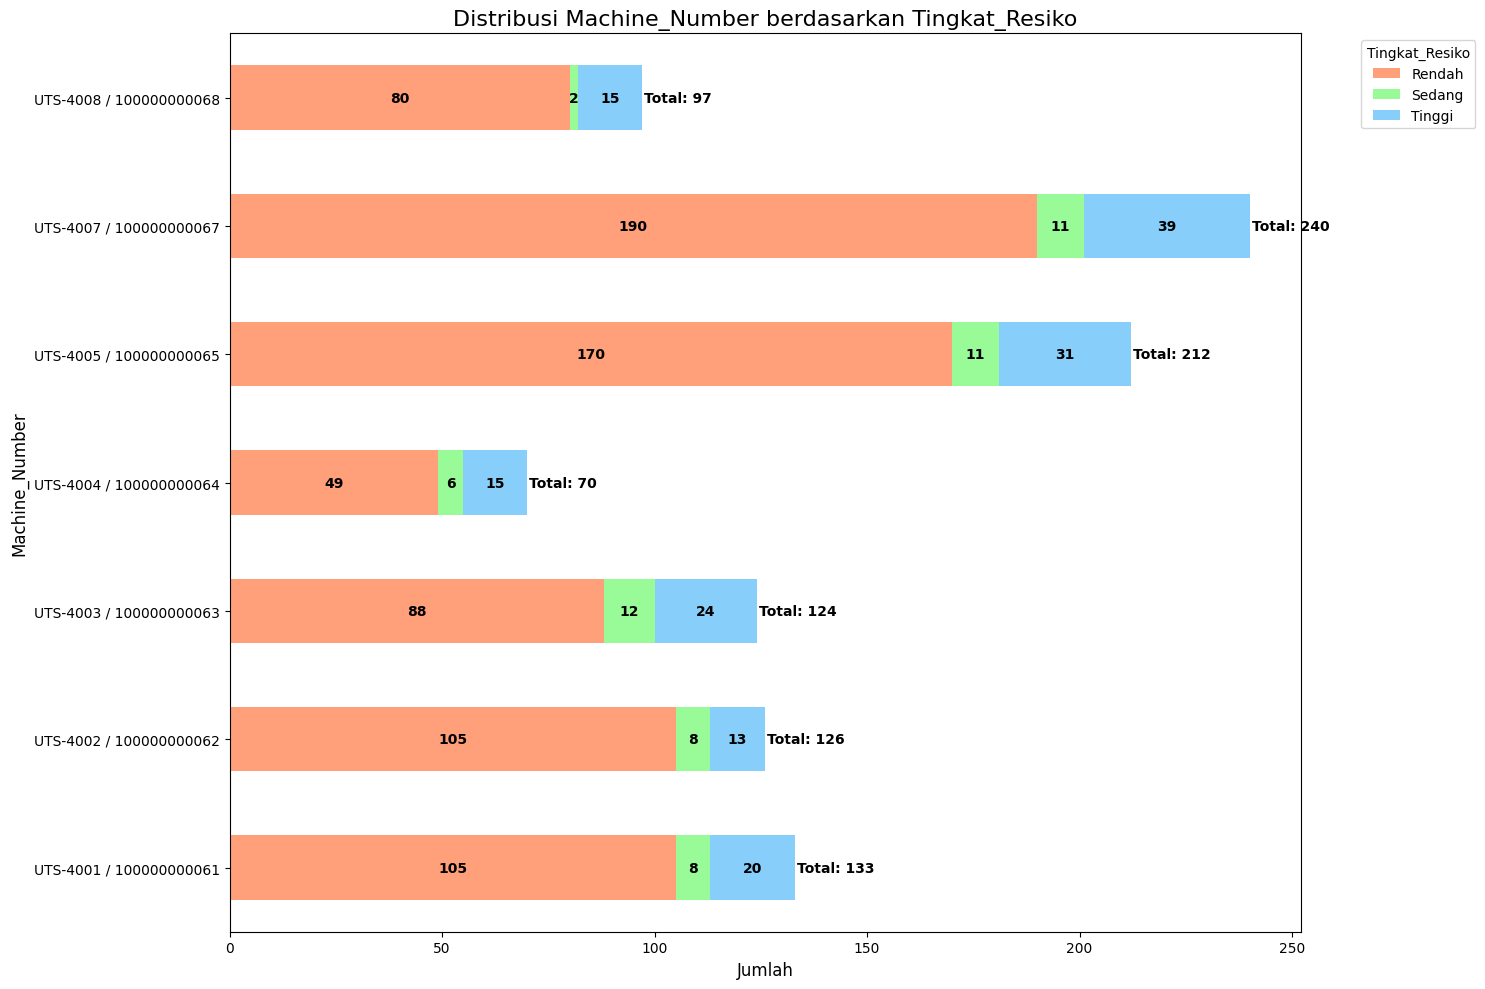

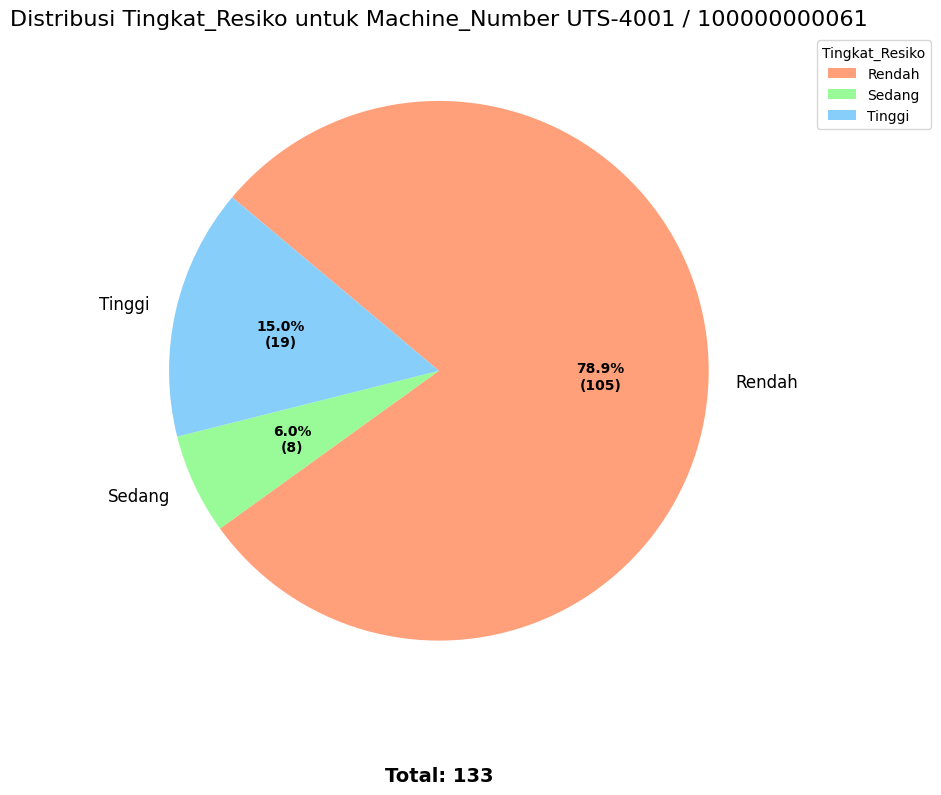

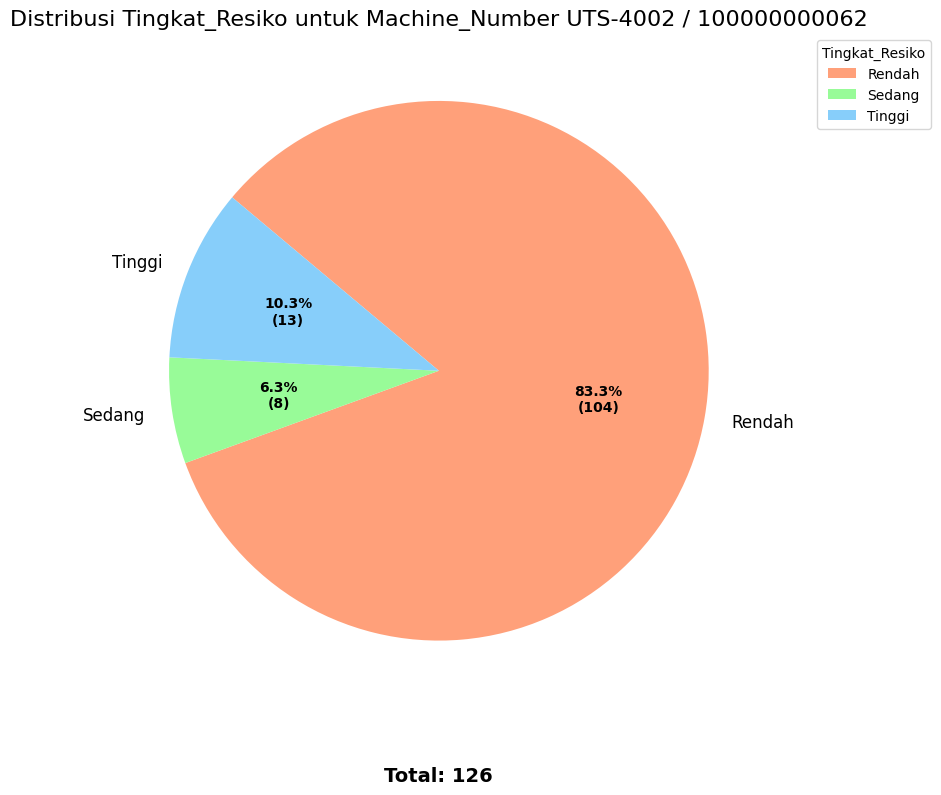

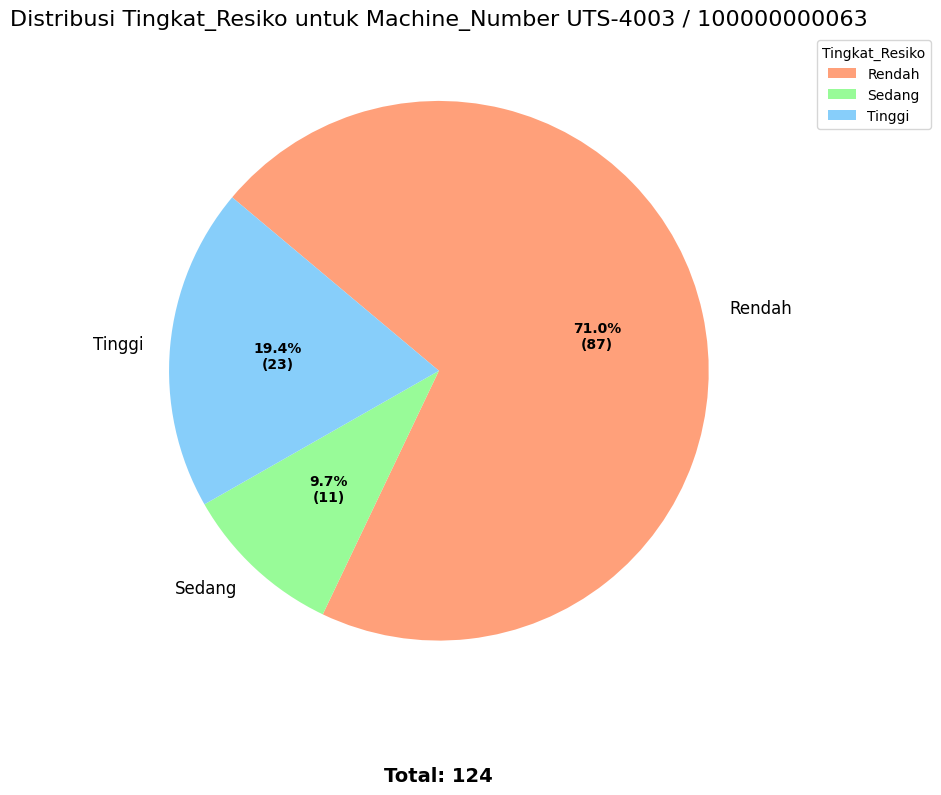

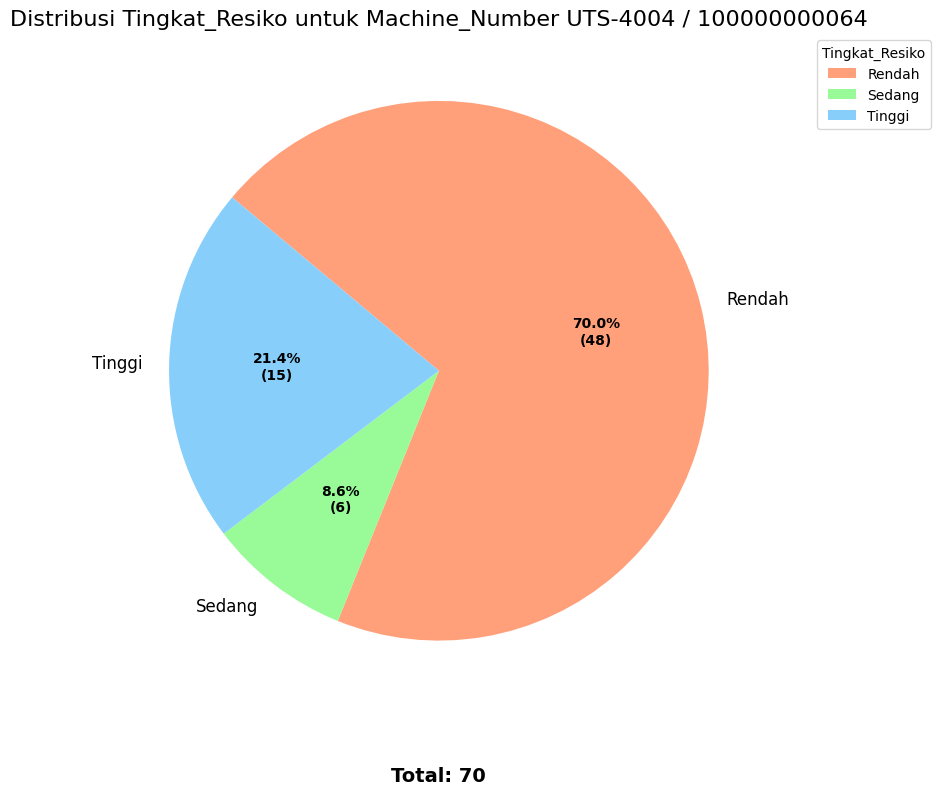

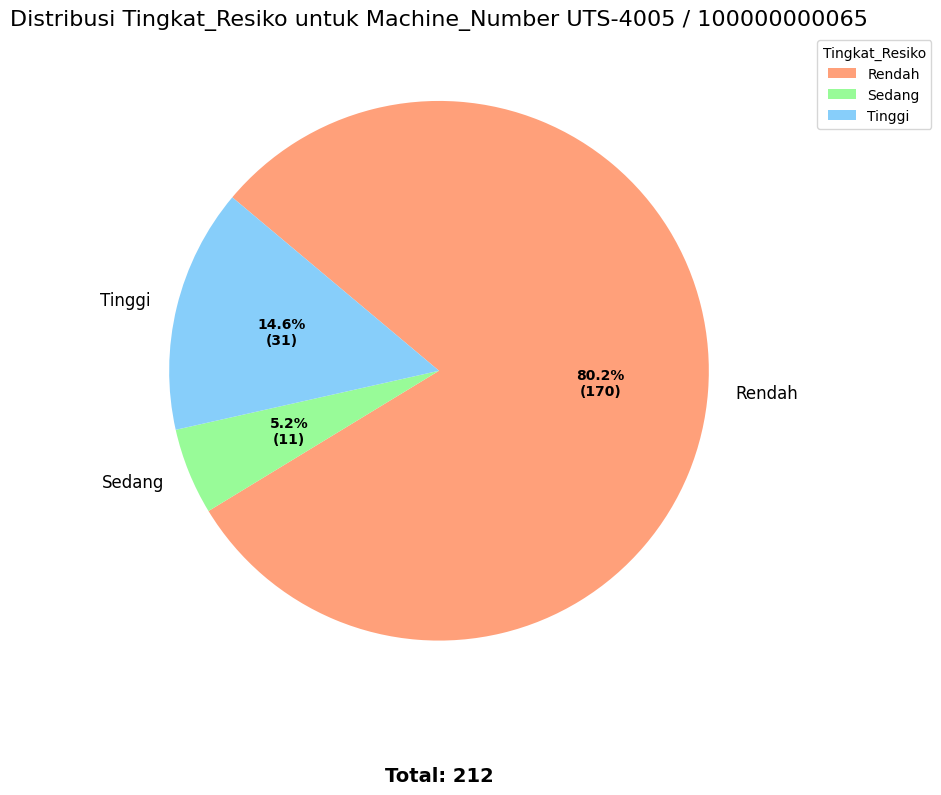

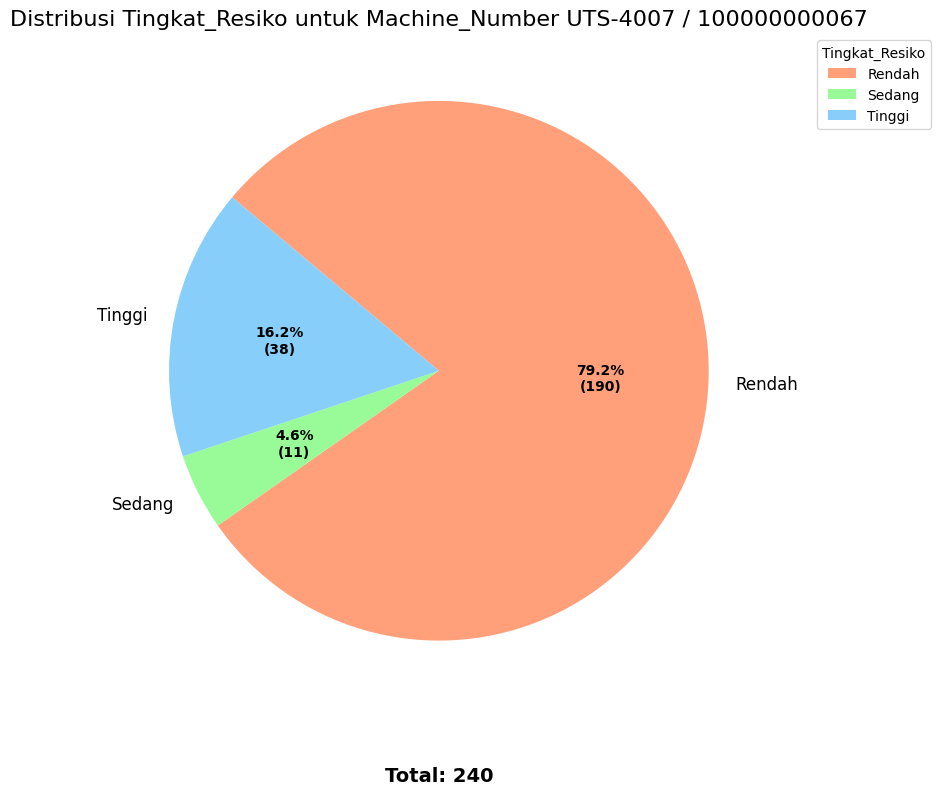

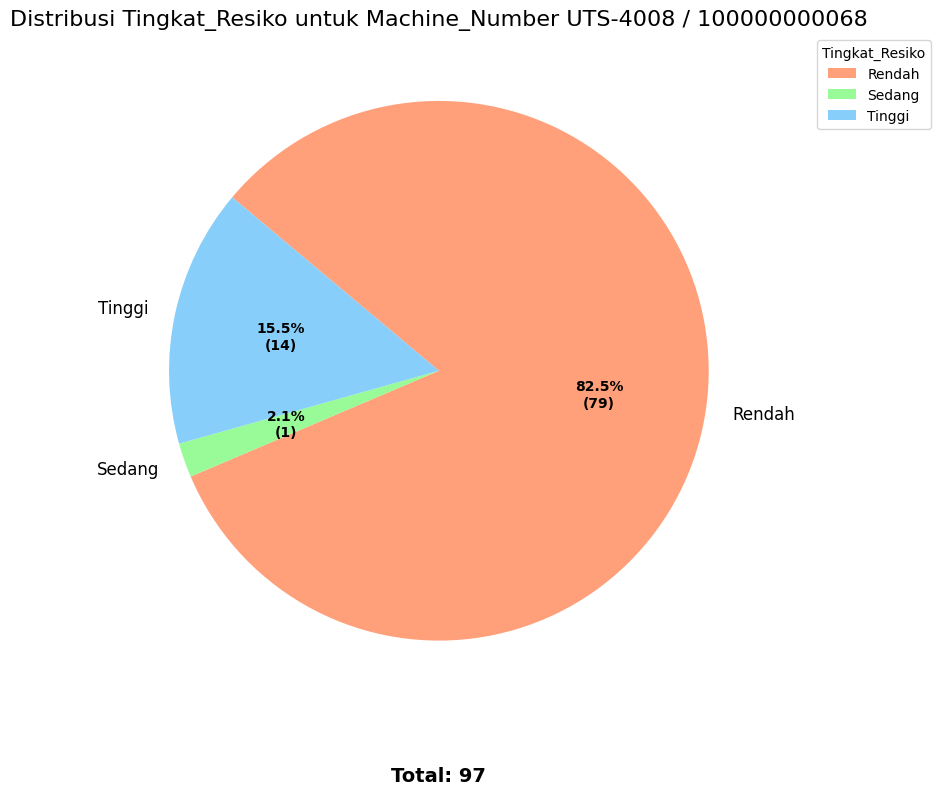

Visualisasi selesai. Gambar telah disimpan di folder 'images'.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import re

file_path = 'train_data.csv'
data = pd.read_csv(file_path)

counts = data.groupby(['Machine_Number', 'Tingkat_Resiko']).size().unstack(fill_value=0)

color_palette = {
    'Rendah': '#FFA07A',
    'Sedang': '#98FB98',
    'Tinggi': '#87CEFA'
}

output_folder = 'images'
os.makedirs(output_folder, exist_ok=True)

# Plot bar chart
fig, ax = plt.subplots(figsize=(15, 10))

counts.plot(kind='barh', stacked=True, color=[color_palette[c] for c in counts.columns], ax=ax)

for i, (index, row) in enumerate(counts.iterrows()):
    left = 0
    for j, value in enumerate(row):
        if value > 0:
            ax.text(left + value/2, i, int(value),
                    ha='center', va='center', color='black', fontweight='bold')
        left += value

totals = counts.sum(axis=1)
for i, total in enumerate(totals):
    ax.text(total + 0.5, i, f'Total: {int(total)}', ha='left', va='center', color='black', fontweight='bold')

plt.title('Distribusi Machine_Number berdasarkan Tingkat_Resiko', fontsize=16)
plt.ylabel('Machine_Number', fontsize=12)
plt.xlabel('Jumlah', fontsize=12)
plt.yticks(rotation=0)

plt.legend(title='Tingkat_Resiko', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

# Save and display bar chart
bar_chart_path = os.path.join(output_folder, 'risk_distribution_bar_chart.png')
plt.savefig(bar_chart_path, format='png', dpi=300, bbox_inches='tight')
plt.show()  # Show the bar chart before closing it

plt.close()

# Plot pie charts for each machine
for machine in counts.index:
    sanitized_machine = re.sub(r'[^\w\-_\. ]', '_', str(machine))

    fig, ax = plt.subplots(figsize=(10, 8))
    wedges, texts, autotexts = ax.pie(counts.loc[machine],
                                      labels=counts.columns,
                                      colors=[color_palette[c] for c in counts.columns],
                                      autopct=lambda pct: f'{pct:.1f}%\n({int(pct/100.*sum(counts.loc[machine]))})',
                                      startangle=140,
                                      counterclock=False)

    plt.setp(autotexts, size=10, weight="bold")
    plt.setp(texts, size=12)

    plt.title(f'Distribusi Tingkat_Resiko untuk Machine_Number {machine}', fontsize=16)
    plt.legend(title='Tingkat_Resiko', bbox_to_anchor=(1.05, 1), loc='upper left')

    total = sum(counts.loc[machine])
    plt.text(0.5, -0.1, f'Total: {total}', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=14, fontweight='bold')

    plt.tight_layout()

    # Save and display pie chart
    pie_chart_path = os.path.join(output_folder, f'pie_chart_machine_{sanitized_machine}.png')
    plt.savefig(pie_chart_path, format='png', dpi=300, bbox_inches='tight')
    plt.show()  # Show the pie chart before closing it

    plt.close()

print("Visualisasi selesai. Gambar telah disimpan di folder 'images'.")


In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

file_path = 'train_data.csv'
data = pd.read_csv(file_path)

counts = data.groupby(['Machine_Number', 'Bagian_Mesin']).size().unstack(fill_value=0)

counts_reset = counts.reset_index()
counts_melt = counts_reset.melt(id_vars=['Machine_Number'], var_name='Bagian_Mesin', value_name='Jumlah')

fig = px.bar(counts_melt, x='Jumlah', y='Machine_Number', color='Bagian_Mesin',
             title='Distribusi Bagian_Mesin berdasarkan Machine_Number',
             labels={'Machine_Number': 'Machine Number', 'Jumlah': 'Jumlah'},
             hover_data=['Bagian_Mesin', 'Jumlah'])

totals = counts.sum(axis=1)
for i, total in enumerate(totals):
    fig.add_trace(go.Scatter(
        x=[total],
        y=[totals.index[i]],
        text=[f'{total}'],
        mode='text',
        showlegend=False
    ))

fig.update_layout(barmode='stack', yaxis={'categoryorder': 'total descending'}, legend_title_text='Bagian Mesin')

fig.show()


In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

file_path = 'train_data.csv'
data = pd.read_csv(file_path)

counts = data.groupby(['Machine_Number', 'Nama_Komponen']).size().unstack(fill_value=0)

top_components = counts.sum(axis=0).sort_values(ascending=False).head(10).index
counts_top = counts[top_components]

counts_top_reset = counts_top.reset_index()
counts_top_melt = counts_top_reset.melt(id_vars=['Machine_Number'], var_name='Nama_Komponen', value_name='Jumlah')

fig = px.bar(counts_top_melt, x='Jumlah', y='Machine_Number', color='Nama_Komponen',
             title='Distribusi Nama_Komponen berdasarkan Machine_Number (Top 10)',
             labels={'Machine_Number': 'Machine Number', 'Jumlah': 'Jumlah'},
             hover_data={'Machine_Number': True, 'Nama_Komponen': True, 'Jumlah': True})

totals = counts_top.sum(axis=1)
for i, total in enumerate(totals):
    fig.add_trace(go.Scatter(
        x=[total],
        y=[totals.index[i]],
        text=[f'{total}'],
        mode='text',
        textposition='top center',
        showlegend=False
    ))

fig.update_layout(
    barmode='stack',
    yaxis={'categoryorder': 'total descending'},
    legend_title_text='Nama Komponen'
)

fig.show()


In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

file_path = 'evaluated_test_data_with_classification.csv'
data = pd.read_csv(file_path)

counts = data.groupby(['Machine_Number', 'Nama_Komponen']).size().unstack(fill_value=0)

top_components = counts.sum(axis=0).sort_values(ascending=False).head(10).index
counts_top = counts[top_components]

counts_top_reset = counts_top.reset_index()
counts_top_melt = counts_top_reset.melt(id_vars=['Machine_Number'], var_name='Nama_Komponen', value_name='Frekuensi')

fig = px.bar(counts_top_melt, x='Frekuensi', y='Machine_Number', color='Nama_Komponen',
             title='Frekuensi Nama_Komponen berdasarkan Machine_Number (Top 10)',
             labels={'Machine_Number': 'Machine Number', 'Frekuensi': 'Frekuensi'},
             hover_data={'Machine_Number': True, 'Nama_Komponen': True, 'Frekuensi': True})

totals = counts_top.sum(axis=1)
for i, total in enumerate(totals):
    fig.add_trace(go.Scatter(
        x=[total],
        y=[totals.index[i]],
        text=[f'{total}'],
        mode='text',
        textposition='top center',
        showlegend=False
    ))

fig.update_layout(
    barmode='stack',
    yaxis={'categoryorder': 'total descending'},
    legend_title_text='Nama Komponen'
)

fig.show()
